# Optical setups for Digital Inline Holography

## Gabor setup (spherical illumination)

Laser $\rightarrow$ [Mirror] $\rightarrow$ [Half-wave plate $\rightarrow$ Polarizer]@532nm $\rightarrow$ Aspherical lens $\rightarrow$ Pinhole $\rightarrow$ Collimating lens $\rightarrow$ Focusing aspherical lens $\rightarrow$ Window 1 $\rightarrow$ Sample $\rightarrow$ Window 2 $\rightarrow$ Camera.

### Mountings

- Laser CryLas FTSS355-Q4 : 4 posts M3
- Neutral Density Filter 05
- Mirror : KCB1C/M kinematic right angle mirror mount 1" (UV Al Enhanced)
- Half-wave plate : rotation mount CRM1/M
- Polarizer : rotation mount CRM1/M
- Aspherical lens : z translation (SM1Z), SM1-MO adaptor (SM1A3), MO-M9 extended adaptor (E09RMS) 
- Pinhole : XY cage stage (ST1XY-S/M)
- Collimating lens : tube and retaining rings
- Focusing aspherical lens : #87984 30 mm cage mount for SP05 optics (CP32/M)
- Window 1 : WG41050-A in LCP02/M adapter to 60 mm cage
- Window 2 : WG42012-A in tube with retaining rings. Tube supported with LCP09
- Camera SVS : SM2int-M52ext M52int-M58ext adapters

Using 30 mm cage system with enclosing tubes (6mm rods).

### Specs

- Laser FTSS355-Q4 355 nm pulsed
- Mirror : Protected silver (450nm-20um), enhanced aluminum (250-450nm) 
- Half-wave plate 532nm
- Polarizer : N-BK7 Windows, 400-700 nm
- Aspherical lens : C230TMD-A 4.51mm (before f=15.29mm, NA=0.16  f = 15.29 mm, ARC: 350 - 700 nm)
- Pinhole : 40 um
- Collimating lens f=100mm N-BK7 350-700 nm
- Focusing aspherical lens UV-VIS 12.5mm dia 12.5mm f 0.5 NA
- Window 1 : 350-700nm 5mm thick
- Window 2 : 350-700nm 12mm thick
- Camera

In [1]:
# The collimating lens placed at a focal distance gives a radius of:
import numpy as np
from matplotlib import pyplot as plt

NA_asph1 = 0.16
f_asph1 = 15.29 # mm
f_coll = 40 # mm
f_asph2 = 12.5 # mm
wavelength = 355e-3 # um
theta = np.arcsin(NA_asph1)
r_coll = np.tan(theta)*f_coll
print("Radius after collimation : {:.2f} mm".format(r_coll))
r_focus = wavelength * f_asph2 / r_coll
print("Radius in focused source : {:.2f} um".format(r_focus))

Radius after collimation : 6.48 mm
Radius in focused source : 0.68 um


## Protections

Camera protection requires that optical power cannot be higher than 1 kW/cm$^2$ CW or 0.1 J/cm$^2$. Laser cases:

- FTS355 : 0.3 mm diameter, 200 $\mu$J.
- GEM532 : 0.5 mm, 1 W

Camera sensor dimensions: 	29.18 x 20.19 mm

In [2]:
# Sensor area
sa = 2.918 * 2.019 # cm2

# Case small beam 355 nm
d355 = .03 # cm
E355 = 200 # uJ
E_small355 = E355 / np.pi / (d355/2)**2 / 1000
print("Energy concentration in small beam for FTS355 : {} mJ/cm2".format(E_small355))
OD_max_suv = 1
atten_E_small355 = E_small355 * 10**(-OD_max_suv)
print("Energy concentration in small beam with NDF OD{} for FTS355 : {} mJ/cm2".format(OD_max_suv, atten_E_small355))

# Case large beam 355 nm
E_large355 = E355 / sa / 1000 # mJ/cm2
print("Energy concentration in whole sensor beam for FTS355 : {} mJ/cm2".format(E_large355))
OD_max_luv = 0
atten_E_large355 = E_large355 * 10**(-OD_max_luv)
print("Energy concentration in whole sensor beam with NDF OD{} for FTS355 : {} mJ/cm2".format(OD_max_luv, atten_E_large355))

# Case small beam 532 nm
d532 = .05 # cm
P532 = 1 # W
P_small532 = P532 / np.pi / (d532/2)**2
print("Power density in small beam for GEM532 : {} W/cm2".format(P_small532))
OD_max_svis = 0.5
atten_P_small532 = P_small532 * 10**(-OD_max_svis)
print("Power density in small beam with NDF OD{} for GEM532 : {} W/cm2".format(OD_max_svis, atten_P_small532))

# Case large beam 532 nm
P_large532 = P532 / sa # W/cm2
print("Power density in whole sensor beam for GEM532 : {} W/cm2".format(P_large532))
OD_max_lvis = 0
atten_P_large532 = P_large532 * 10**(-OD_max_lvis)
print("Power density in whole sensor beam with NDF OD{} for GEM532 : {} W/cm2".format(OD_max_lvis, atten_P_large532))

Energy concentration in small beam for FTS355 : 282.94212105225836 mJ/cm2
Energy concentration in small beam with NDF OD1 for FTS355 : 28.29421210522584 mJ/cm2
Energy concentration in whole sensor beam for FTS355 : 0.03394754628832805 mJ/cm2
Energy concentration in whole sensor beam with NDF OD0 for FTS355 : 0.03394754628832805 mJ/cm2
Power density in small beam for GEM532 : 509.295817894065 W/cm2
Power density in small beam with NDF OD0.5 for GEM532 : 161.0534787343585 W/cm2
Power density in whole sensor beam for GEM532 : 0.16973773144164025 W/cm2
Power density in whole sensor beam with NDF OD0 for GEM532 : 0.16973773144164025 W/cm2


## Timing with nanodispenser

The initial velocity determines how far the drop gets in horizontal axis and the time to reach the field of view. 
$$v_0 = v_{0x} \sin(\phi) \hat{x} + v_{0y} \cos(\phi) \hat{y}$$
$$x(t) = v_{0x} t$$
$$y(t) = v_{0y} t + 5 \frac{\mbox{m}}{\mbox{s}} t^2$$


In [3]:
phi = np.pi/4
v0 = 0.5 # Initial velocity m/s
d = 0.10 # m Distance to impact/field of view from dispenser
d_cm = d * 100
v0x = v0 * np.sin(phi)
v0y = v0 * np.cos(phi)
t = np.roots([5, v0y, -d])
t = np.max(t)
print("The time to go along a distance of {} cm is {} s".format(d_cm, t))
x = v0x * t
x_cm = x * 100
print("The travelled distance in x axis is {} cm.".format(x_cm))
vy_end = v0y + 10 * t
t_1mm = 0.001 / vy_end * 1000 # ms
print("The final velocity in y is {} m/s, so it takes {} ms to travel 1 mm distance.".format(vy_end, t_1mm))

The time to go along a distance of 10.0 cm is 0.11041845831180512 s
The travelled distance in x axis is 3.9038820320220755 cm.
The final velocity in y is 1.457737973711325 m/s, so it takes 0.6859943405700355 ms to travel 1 mm distance.


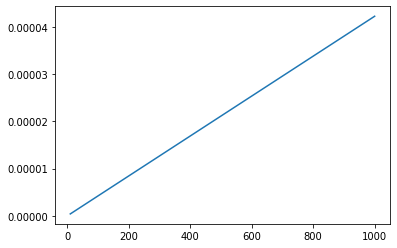

In [4]:
# If I want to scan the YZ plane with the trajectory of the drops, then I need to know different curves of Y displacement for different angles at different Z heights.
Nh, Na = 5, 100
hs = np.linspace(0.04, 0.15, Nh)  # heights in m
angles = np.linspace(0, np.pi/3, Na) # angles of shooting with respect to Y axis
v0xs = v0 * np.sin(angles)
v0ys = v0 * np.cos(angles)
tss = np.zeros((Nh, Na, 2))
for kh in range(Nh):
    for ka in range(Na):
        tss[kh, ka] = np.roots([5, v0ys[ka], -hs[kh]])
tss = tss.max(axis=2)
xs = v0xs * tss
# plt.plot(angles,xs.T)
# plt.ylabel("Distance from departure (m)")
# plt.xlabel("Angle with respect to vertical (rad)")

# Resolution
# What is the resolution in x if the height was fixed and the x displacement is around 2 cm.
resols = np.logspace(1, 3, Na) # urad
phi_ini = 0.7
h_fix = 0.1
v0x_ini = v0 * np.sin(phi_ini)
v0y_ini = v0 * np.cos(phi_ini)
t_ini = np.roots([5, v0y, -h_fix])
t_ini = np.max(t)
x_ini = v0x_ini * t_ini
dxs = np.zeros(Na)
for kr in range(Na):
    phi_end = phi_ini + resols[kr] * 1e-6
    v0x_end = v0 * np.sin(phi_end)
    v0y_end = v0 * np.cos(phi_end)
    t_end = np.roots([5, v0y, -h_fix])
    t_end = np.max(t)
    x_end = v0x_end * t_end
    dxs[kr] = x_end - x_ini
plt.figure
plt.plot(resols, dxs)

## Triggering circuit

The board has several connectors. Starting from the corner with the number 25, there are 2 pin connectors for +5V (1, 2). Then, connector white (W1), 2 pin connectors and a cable for GND (3,4,5). The BNC connector is for sending trigger signals to the laser head of FTS355. Then, 3 pin connectors (6,7,8, starting from the border of the board). Two white connectors W2, W3. So, for using it they have to be connected as:

1. Power source +5V.
2. +5V for powering the NI-6517. Goes to pin 19.
3. Power source GND
4. GND for the NI-6517. Goes to pin 5.
5. GND for oscilloscope probes
6. Trigger signal for camera (frame grabber) P0-L0 from 6517, pin 1.
7. Trigger signal for drop dispenser, P0-L1 from 6517, pin 20.
8. Trigger signal for laser, P0-L2 from 6517, pin 2.
9. W1 : only 5V to frame grabber.
10. W2 : Connector to frame grabber (trigger signal and GND).
11. W3 : Connector to drop dispenser (trigger signal and GND).
12. BNC : Connector to laser control box (trigger signal and GND).

## Mounting static sample

- Focusing aspherical lens : 30 mm cage mount for SP05 optics (CP32/M) : 4 mm
- Window 1 : LCP02/M adapter to 60 mm cage : 13 mm
- Sample : R2L2S3P1 in CYLCP/M : 7 mm + 1 mm sample + 7 mm
- Window 2 : in tube with retaining rings. Tube supported with LCP09 and touching CYLCP/M : 29.2 mm
- Camera : SM2int-M52ext SM2A52 M52int-M58ext 59447 adapters : 4.3 mm + 11.5 mm

Distance from focal point (12.5 mm) to sample : 12 mm

Distance from sample to sensor : 52 mm

### Mounting LED illumination

LEDs:

- LED631E : 20mA : 2.2 V, 4 mW (light), 140 $\Omega$, 44 mW ; 50 mA : 2,6 V, 48 $\Omega$, 130 mW, use 82 $\Omega$
- LED370E : 20 mA : 3.5 V, 2.5 mW (light), 75 $\Omega$, 70 mW ; 30 mA : 4.3 V, 23 $\Omega$, 129 mW, use 51 $\Omega$
- LED375L : 20 mA : 3.6 V, 1 mW (light), 70 $\Omega$, 72 mW ; 30 mA : 4 V, 33 $\Omega$, 120 mW, use 51 $\Omega$

In [2]:
# Power and resistance calculation
V_source = 5  # V
V_led = 4   # V
I_led = 30    # mA
R = (V_source - V_led) / I_led *1000   # ohm
P = V_led * I_led   # mW
print("The resistance is {:.2f} \u2126 and the power in the LED is {:.2f} mW".format(R, P))
ga = np.sqrt(48*140)
print("Geometric average : {}".format(ga))

The resistance is 33.33 Ω and the power in the LED is 120.00 mW


NameError: name 'np' is not defined

## Mounting motorised linear stage in z axis
Using the 30 mm cage system. CP02B 2 rods M4 thru holes, 8-32 screw nuts and MSA8, with 4-40 screwset to rod (socket set). In the lower CP03B one of the nuts is replaced by a AS8E4M to attach to a post with base (attached to the table). 2 6" rods go straight to a CPMA2/M attached to a post with an M4 cap screw. 3 ER90B/M attach a rod to the linear stage with an M3 screw, and a 4th one is used to lock movement on the other rod.

Requiring M3 screws (3 mm + 2.5 mm? = 5 mm or 6?), M4 screws 10,12,16,20.

# Experiments

## Freezing levitated droplet

### Description

An acoustic levitator is used for keeping one or more floating droplets in the air while a high speed camera gets images (holograms) of them freezing inside a cold room with decreasing temperature. The camera acquires images continuously with single laser pulses occurring at the time when the exposure is ON. The acquisition stops after the freezing event occurs. Ideally, this time is detected automatically. First experiments will be useful for determining the features that may be used to detect the freezing event.

### Measuring system

An enclosed inline holographic system is used. The door must be closed in order to turn on the laser and heaters after the alignment is completed (closed door detector). The alignment can be done before taking the equipment to the cold room, the laser can be turned on with the door opened when set to alignment mode (key switched). 

The temperature in the cold room can go from 0°C to -30°C. The temperature inside the enclosure cannot go below 0°C. A 30 W (220V) heater is used for raising the temperature inside the enclosure. A microcontroller (MCU) based board is used to turn the heater on when the temperature is dropping below 2°C. The temperature of the laser (covered by thermal insulator) is also controlled by a 5W heater as it must not go below 18°C. The temperatures of the MCU, the air inside of the enclosure and the laser are measured and informed by the MCU via USB (USART).

The PC outside the room controls:
- acquisition of camera (Euresys CoaxlinkQuadG3)
- Laser trigger (Euresys CoaxlinkQuadG3)
- ON/OFF laser (USB)
- KASA Power strip (smartphone or online) -> acoustic levitator
- configuration of Nucleo SMT32

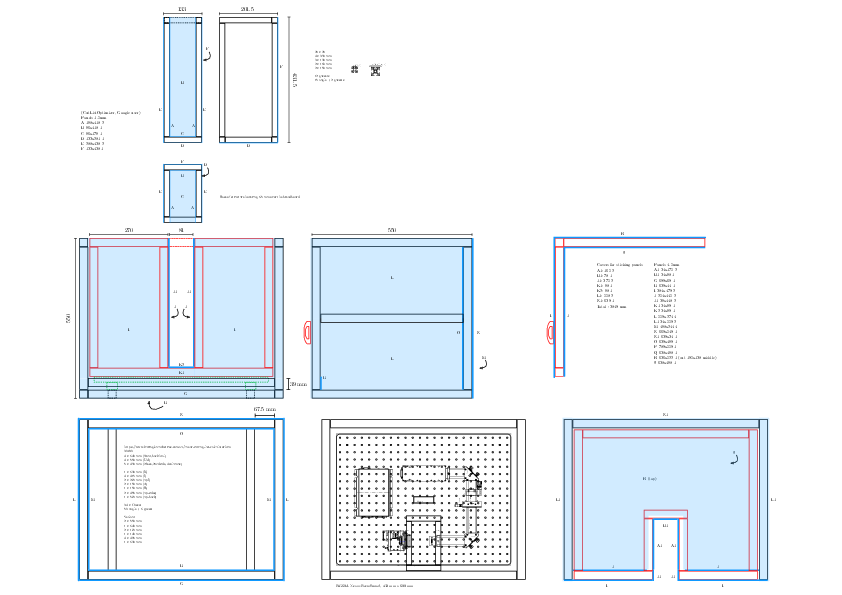

In [1]:
from wand.image import Image as WImage
img = WImage(filename='./Files/Design_Al_breadboard.pdf')
img

## Enclosure for cold room

See files in 'C:\Users\j05625pe\Documents\Work\Equipment\Cold chamber enclosure'

### Support and enclosure

Get materials and cutting list for the Physics Workshop. Use kerf thickness 5mm. Tolerance is 0.1 mm for the length of rails and 0.5 mm for the sheets.

[Nexus Breadboard](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=7154&pn=B4560A#7157), 450 mm x 600 mm x 60 mm, 28 kg

| Thorlabs | B4560A	| Nexus Breadboard, 450 mm x 600 mm x 60 mm, M6 x 1.0 Mounting Holes | £633.86 | 1 | 8-9 weeks lead time

Changed to:
- [MBH4560/M](https://www.thorlabs.com/thorproduct.cfm?partnumber=MBH4560/M) Aluminum Breadboard, 450 mm x 600 mm x 19.05 mm, M6 Taps £391.76 

The breadboard needs to be inside the enclosure and isolated from any metal part in the enclosure's frame. I am using 2 cm separation between the breadboard and the frame. 30 mm profile struts for higher load capacity than 20 mm that was only for the weight of the enclosure. Now, the frame holds the entire system.

Other weights:
- Laser + OEM-IL : ?
- Mirror mount : 0.2 kg
- Z axis : 0.2 kg
- XY : 0.25 kg
- Collimating : 0.15 kg
- Focusing : 0.1 kg
- Window 1 : 0.1 kg
- Window 2 : 0.1 kg
- Camera : 2 kg
- Posts (post, holder, foot) x10 (0.1, 0.075, 0.025 = 0.2) = 2 kg

Total : < 40 kg
- 4 [AV5/M](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=6421&pn=AV5/M) supports : up to 60 kg.

Volume@30mm height : $0.45 * .6 * .3 \mbox{m}^3 = 0.1 \mbox{m}^3$

Connection between door frame and enclosure frame:
- Bosch Rexroth, Sealing Profile, 8mm Slot, 10 m [RS 437-1312](https://uk.rs-online.com/web/p/door-components/4371312/) £51.55 # 1
- 5 mm separation

Door stay: [RS 847-3116](https://uk.rs-online.com/web/p/door-stays/8473116/) Camloc Gas Springs Lid Stay £9.07

Plastic sheets of enclosure (double glazed, using variofix):
- [RS 704-8201](https://uk.rs-online.com/web/p/plastic-sheets/7048201/) Grey Plastic Sheet, 1000mm x 1000mm x 4.5mm x2 £72.59 # 2
- [RS 680-757](https://uk.rs-online.com/web/p/plastic-sheets/0680757/) Grey Plastic Sheet, 1000mm x 500mm x 4.5mm x3 £53.35 # 1

Frame is covered by pieces of plastic sheet glued to strut covers [RS 767-5623](https://uk.rs-online.com/web/p/cover-strips/7675623/) RS PRO Cover Strip, PP, 8mm Slot, Black, 10pcs x 2m £11.81 # 1

Plastic sheets of sample volume (thinner for easy adaptation of optomechanics, double glazed in single groove):
- [RS 748-1305](https://uk.rs-online.com/web/p/plastic-sheets/7481305/?sra=pstk) Black, White Plastic Sheet, 1300mm x 500mm x 1.5mm RS PRO £64.44 # 1

NOT ANYMORE : The double sheet of 1.5 mm goes into 6mm groove with a strip in between. RS 170-6147 [TE Connectivity Polyolefin Black Edging strip](https://uk.rs-online.com/web/p/door-seals/1706147/?sra=pstk), 1.2m x 6 mm x 3.4mm £2.66

Plastic sheet attachment:
- T-nut 6mm : 34
- [RS 291-436](https://uk.rs-online.com/web/p/machine-screws/0291436/) RS PRO, M4 Countersunk Head, 6mm Nylon Slot Plain x100 £8.83 # 1
- Variofix 6mm : 9 [RS 124-7847](https://uk.rs-online.com/web/p/door-components/1247847/) Bosch Rexroth PP, Variofix Block, 6mm Slot x10 £11.55 # 1
- [RS 291-442](https://uk.rs-online.com/web/p/machine-screws/0291442/) RS PRO, M4 Countersunk Head, 12mm Nylon Slot Plain x100 £10.20 # 1
- T-nut 8mm : 86 : [RS 390-0240](https://uk.rs-online.com/web/p/connecting-components/3900240/) Bosch Rexroth T-Slot Nut, M5 Thread strut profile 30 mm, Groove Size 8mm 1 Bag of 10 £5.95 # 9
- [RS 291-486](https://uk.rs-online.com/web/p/machine-screws/0291486/) RS PRO, M5 Countersunk Head, 12mm Nylon Slot Plain 1 Bag of 100 £9.82 # 1
- Variofix 8mm : 34 [RS 124-7848](https://uk.rs-online.com/web/p/door-components/1247848/) Bosch Rexroth PP, Variofix Block, 8mm Slot x10 £26.98 # 4
- [RS 291-509](https://uk.rs-online.com/web/p/machine-screws/0291509/) RS PRO, M5 Countersunk Head, 20mm Nylon Slot Plain x100 £10.63 # 1

Clamping to table:	
- [RS 767-5557](https://uk.rs-online.com/web/p/connecting-components/7675557/) RS PRO Connector Bracket & Joint Floor Bracket, strut profile 30 mm, Groove Size 6mm £8.77 # 4
- [RS 473-3603](https://uk.rs-online.com/web/p/socket-screws/4733603/) Yahata Neji M4 x 20mm Hex Socket Cap Screw Black Oxide Steel 1 Box of 100 £10.01 # 1
- NOT NECESSARY [RS 466-7304](https://uk.rs-online.com/web/p/connecting-components/4667304/?sra=pstk) Screws S6 x10 £4.03
- [RS 466-7281](https://uk.rs-online.com/web/p/connecting-components/4667281/?sra=pstk) Bosch Rexroth Strut Profile T-Slot Nut, M4 Thread strut profile 20 mm, Groove Size 6mm £5.95 # 5

Construction rails and structure: 
- [RS 389-9780](https://uk.rs-online.com/web/p/tubing-and-profile-struts/3899780/) Bosch Rexroth Strut, 30 x 30 mm, 8mm Groove , 2000mm Length £29.71 # 7
- [RS 212-3292](https://uk.rs-online.com/web/p/tubing-and-profile-struts/2123292/) Bosch Rexroth Strut, 20 x 20, 6mm Groove , 1m Length £13.97 # 1
- [RS 212-3293](https://uk.rs-online.com/web/p/tubing-and-profile-struts/2123293/?sra=pstk) Bosch Rexroth strut 20x20 groove 6mm 2m length (5 mm depth) £20.94 # 1
- [RS 466-7326](https://uk.rs-online.com/web/p/connecting-components/4667326/?sra=pstk) Bosch Rexroth Strut Profile Gusset, strut profile 20 mm, Groove Size 6mm x10 £11.76 (complete sheets) # 1
- [RS 200-7286](https://uk.rs-online.com/web/p/connecting-components/4667326/?sra=pstk) Bosch Rexroth Angle Bracket, strut profile 20 mm, Groove Size 6mm x10 £11.80 # 0 (already available)
- [RS 390-0420](https://uk.rs-online.com/web/p/connecting-components/3900420/) Bosch Rexroth Strut Profile Gusset, strut profile 30 mm, Groove Size 8mm x10 £51.82 # 1
- [RS 390-1798](https://uk.rs-online.com/web/p/connecting-components/3901798/?sra=pmpn) Bosch Rexroth Strut Profile Angle Bracket (set), strut profile 30 mm, Groove Size 8mm x10 £37.20 # 5
- [RS 390-2123](https://uk.rs-online.com/web/p/door-components/3902123/) Bosch Rexroth, Ball Catch, 10mm Slot £7.04 # 2
- [RS 390-0256](https://uk.rs-online.com/web/p/connecting-components/3900256/) Bosch Rexroth Strut Profile T-Slot Nut, M6 Thread strut profile 30 mm, Groove Size 8mm x10 £5.95 # 1
- [RS 171-893](https://uk.rs-online.com/web/p/socket-screws/0171893/) RS PRO M6 x 16mm Hex Socket Countersunk Screw Plain Stainless Steel 1 Box of 50 £9.86 # 0 Already available
- [RS 122-4387](https://uk.rs-online.com/web/p/plain-washers/1224387/) Bright Zinc Plated Steel Plain Washer, 0.9mm Thickness, M6 (Form B) x100 £1.16 # 1
- [RS 466-7461](https://uk.rs-online.com/web/p/door-components/4667461/?sra=pstk) Bosch Rexroth, Door Handle, 6mm Slot £4.05 # 2
- [RS 231-964](https://uk.rs-online.com/web/p/ptfe-tapes/0231964/?sra=pstk) Sealant tape 0.2 mm 5m £1.32 # 3
- [RS 197-1052](https://uk.rs-online.com/web/p/feet-castors-base-clamps/1971052/) Bosch Rexroth Feet, Foot 1 Bag of 10 £16.04 # 1


NOT NECESSARY:
- [RS 493-8252](https://uk.rs-online.com/web/p/tubing-and-profile-struts/4938252/) Bosch Rexroth Strut, 30 x 30 mm, 8mm Groove , 1000mm Length £17.04 
- 212-3295 Bosch Rexroth strut [20x40](https://uk.rs-online.com/web/p/tubing-and-profile-struts/2123295/?sra=pstk) groove 6mm 2m length
- Possible angle Connection 523-376 466-7354 200-7286 (requires cutting a shape in corners of sheets)
- [Bosch Rexroth Corner Cube Kit](https://uk.rs-online.com/web/p/connecting-components/4667433/?sra=pstk), 20 mm, Groove Size 6mm RS 466-7433 £6.18 (easier for 20x20 rails)
- 2 [Thorlabs XE25LS](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=6751&pn=XE25LS) Lid Stop for 25 mm Rail Enclosures £5.89

RS 212-3293 20x20 : 1 x 2m, 1 x 1m
- 4 x 390 mm
- 3 x 130 mm
- 2 x 160 mm
- 2 x 180 mm

RS 493-8252 30x30 : 7 x 2m
- 4 x 640 mm
- 4 x 550 mm
- 8 x 490 mm
- 1 x 630 mm
- 4 x 415 mm
- 2 x 270 mm
- 2 x 180 mm
- 1 x 150 mm
- 2 x 485 mm
- 1 x 570 mm

Connectors:
- 10 x Gussets Groove 6
- 10 x Angle brackets Groove 6 Strut 20
- 10 x Gussets Groove 8
- 50 x Angle brackets Groove 8 Strut 30

Plastic sheet 1300x500x1.5 mm # 1:
- 2 180x410
- 1 86x410
- 1 86x178
- 1 133x201
- 2 200x430
- 1 133x430

Plastic sheet 1000x1000x4.5 mm :
- 2 34x175
- 1 34x80
- 1 699x69
- 1 639x44
- 2 304x479
- 2 254x445
- 2 38x440
- 1 34x89
- 1 34x89
- 4 559x274
- 2 34x559
- 4 480x244
- 1 669x549
- 1 639x34
- 1 639x489
- 1 709x559
- 1 630x480
- 1 636x522
- 1 630x480

### Additional optomechanics

Jonny's meeting: Make room for bigger camera. Symmetric enclosure.

[Thorlabs KCB1C/M](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=6813&pn=KCB1C/M#8309) Right-Angle Kinematic Mirror Mount with Smooth Cage Rod Bores, 30 mm Cage System and SM1 Compatible £110.47

[Thorlabs PF10-03-F01](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=12393&pn=PF10-03-F01) Ø1" UV-Enhanced Aluminum Mirror £40.19

### Windows

Source side:
- [CP32/M](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=2273&pn=CP32/M#6683) 30mm cage system, SM05 optic mount. Already available.
- [SM1A1 Adapter](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=1524&pn=SM1A1#3235) with External SM05 Threads and Internal SM1 Threads £16.40

Camera side:
- [Thorlabs SM1.5L03](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=12871&pn=SM1.5L03#13042) SM1.5 Lens Tube, 0.30" Thread Depth, One Retaining Ring Included £22.89
- [Thorlabs SM2A57](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=4956&pn=SM2A57#7358) Adapter with External SM2 Threads and Internal SM1.5 Threads
- [Thorlabs SM2A55](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=4956&pn=SM2A55#7362) Adapter with External C-Mount Threads and External SM2 Threads (Optronis and Photron, already available)

Not necessary:
- | Thorlabs | SM1A69 | Adapter with External SM1 Threads and Internal SM1.5 Threads | £18.16 | 1 |

### Operational temperatures and humidity

- Laser FTS355 : 18 - 35 °C (40W)
- Camera Optronis : 0 - 40 °C, humidity <80%	(10W)
- Camera SVS Vistek : -10 - 55 °C, humidity 10-90%(14W)
- Camera Photron : 0 - 40 °C , humidity <85%	(50W)
- Linear stage : 0 - 50 °C

### Electronics

[Nucleo STM32F091RC](https://www.st.com/en/evaluation-tools/nucleo-f091rc.html). 32 bit MCU, Timers, ADC, SPI, I2C.  7 cm x 8 cm
- Main interlock door closed (deactivates laser and heater)
- Alignment mode key switch (deactivates heater)
- LED panel control
- temperature measurements
- heating control (laser and inside enclosure)
- USART with virtual COM to PC

Inside the control box, not in a DIN rail.

DIN rail support (6.3 mm holes, 7.5 mm height):
- Wago, 260, 261, 262 Mounting Adapter for Terminal Block [RS 101-3877](https://uk.rs-online.com/web/p/din-rail-terminal-accessories/1013877/)
- Richco 469.09.20, 20mm High Polyamide Round Spacer, 6 mm outer diameter [RS 102-6160](https://uk.rs-online.com/web/p/round-spacers/1026160/) with M4
- HS 6 6, 19.1mm High CPVC Hex Spacer 6.4mm Wide, With 2.8mm Bore Diameter for M3, No.6 Screw [RS 265-2388](https://uk.rs-online.com/web/p/hex-spacers/2652388/)
- SOLVED WITH [THORLABS TR20/M](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=1266&pn=TR20/M)
- It could also go attached to a panel : 11mm High Polyamide Round Spacer [RS 184-2369](https://uk.rs-online.com/web/p/round-spacers/1842369/) x50 £8.75 (M3x10 screws available)

All terminals and cables should be inside the control box that is inside the main enclosure.

### Moisture

Desiccant: silica gel
For a well sealed enclosure:
- 170 grams per cubic metre of volume

20 g should be enough. [100 sachet 10g](https://www.rapidonline.com/antistat-309-0081-silica-gel-desiccant-sachet-10g-non-indicating-40-x-75mm-100-87-9922) : Rapid Electronics Ltd 87-9922 # 1

thermo hygrometer?

### Temperature

Thermal conductivity k = Q d/ A/(T2-T1) <br />
PETG 0.19 W/mK <br />
PMMA 0.19 W/mK <br />
PC 0.22 W/mK <br />
T2 = 2°C <br />
T1 = -30°C <br />
A = 1 m2 <br />
Q = 420 W <br />
d = 6 mm <br />
More details in Python below.

#### Heaters and T measurements

- [RS 759-4820](https://uk.rs-online.com/web/p/enclosure-heaters/7594820/?sra=pstk) Enclosure Heater, 100W. Nimbus D175, 370184,01 £29.57 # 1
- NOT NECESSARY: [RS 759-4814](https://uk.rs-online.com/web/p/enclosure-heaters/7594814/?sra=pstk) Enclosure Heater, 30W Nimbus D65, 370177,01 DBK Enclosures £17.57

Slotted DIN rail 1m 35 mm EN50 022 [RS 899-0917](https://uk.rs-online.com/web/p/din-rails/8990917/?sra=pstk) £2.42 # 1

Fuse 6.3 A (for 100W heater) **Use 1A fuse. Fuses go into panel mount fuse holders in control box**:
- Rapid Electronics 66-0464 Fuse holder : fuses UL Class cC and midget fuses, and IEC 10x38 fuses
- RS 188-1613 Fuse holder : 10X38MM FUSES : Cartridge Fuse 188-7044 6A 
- [RS 501-871](https://uk.rs-online.com/web/p/rail-mount-fuse-holders/0501871/?sra=pstk) Fuse holder : 5x20 fuses : 563-706 cartridge fuse 6.3A

Fuse 4A (30W heater) **Use 1A fuse**:
- [RS 668-5972](https://uk.rs-online.com/web/p/cartridge-fuses/6685972/?sra=pstk) RS PRO, 4A Glass Cartridge Fuse, 5 x 20mm, Speed F

Laser at 20°C:

Dimensions 147 mm x 54 mm x 39 mm

Bended insulator (envelope shape): Flame Retardant Calcium-Magnesium Silicate Thermal Insulation, 2.8m x 610mm x 2mm [RS 724-8906](https://uk.rs-online.com/web/p/thermal-insulation/7248906/?sra=pstk) £44.92

Consider heater : RS PRO Silicone Heater Mat, 5 W, 50 x 100mm, 12 V dc [RS 245-528](https://uk.rs-online.com/web/p/heater-pads/0245528/?sra=pstk)

##### Thermocouples:
- PFA or PTFE housing
- Class 3, Type T (accuracy 1.5°C), K, N, E (accuracy 2.5°C). -200°C to 40°C
- Cable length up to 100 Ohms
- Measurement of out temperatures outside and inside of the enclosure and temperature of laser.
- RS PRO Type K Thermocouple 1m Length, 2mm Diameter → +250°C x5 £14.12 [RS 621-2158](https://uk.rs-online.com/web/p/thermocouples/6212158/)

Thermocouple to digital output boards:
- Seeed Studio, Grove - I2C Thermocouple Amplifier I2C Module, MCP9600 for K-Type Thermocouple 20mm x40mm x18mm - [RS 188-7107](https://uk.rs-online.com/web/p/sensor-development-tools/1887107/?sra=pstk) £11.51
- Maxim MAX31855PMB1#, SPI Peripheral Module Thermocouple Sensor Development Board [RS 191-4223](https://uk.rs-online.com/web/p/sensor-development-tools/1914223/?sra=pstk) £14.32

Thermocouple to analog:
- Seeed Studio, 1-Wire Thermocouple Amplifier Module, MAX31850K - [RS 188-7118](https://uk.rs-online.com/web/p/sensor-development-tools/1887118/?sra=pstk) £8.39 (thermocouple cable)
- Adafruit 1778 Analog Output K-Type Thermocouple Amplifier - AD8495 Rapid Electronics Ltd 73-5399 £12.28 (thermocouple cable)


### Connections of enclosure and cables passing through panels

Cables from the PC to the enclosure should be at least 3m long. Up to 5m.

#### Main for the heater, and laser controller:

Discarded:

- NOT SUITABLE FOR HARSH ENVIRONMENTS Schurter C14 Panel Mount IEC Connector Male, 10A, 250 V, Fuse Size 5 x 20mm [RS 867-7184](https://uk.rs-online.com/web/p/iec-connectors/8677184/) £5.19
- *TOO BIG* Legrand, P17 Tempra Pro IP44 Blue Cable Mount 2P+E Industrial Power Plug, Rated At 16.0A, 230.0 V [RS 
821-1898](https://uk.rs-online.com/web/p/industrial-power-connectors/8211898/) £5.40
- *TOO BIG* Legrand, P17 Tempra Pro IP44 Blue Cable Mount 2P+E Industrial Power Socket, Rated At 16.0A, 230.0 V
[RS 821-1873](https://uk.rs-online.com/web/p/industrial-power-connectors/8211873/) £5.74
- Amphenol Eco-Mate
- Bulgin Crimp, Solder Connector, 3 Contacts, Socket, Front Mount Miniature, IP68, IP69K [RS 426-1063](https://uk.rs-online.com/web/p/industrial-circular-connectors/4261063/) £6.45 *6.2 mm max thickness panel, only rear panel*
- Bulgin Crimp, Solder Connector, 3 Contacts, Cable Mount Miniature, IP68, IP69K [RS 426-0903](https://uk.rs-online.com/web/p/industrial-circular-connectors/4260903/) £6.97

Industrial Circular Connectors **Use cable mount connectors if the panel mount connectors don't fit in double glazed thick panels**

- Bulgin Screw Connector, 3 Contacts, Panel Mount, IP68 [RS 489-380](https://uk.rs-online.com/web/p/industrial-circular-connectors/0489380/) *5.2 max panel thickness* # 2
- Bulgin Screw Circular Connector, 3 Contacts, Cable Mount, IP68 [RS 489-396](https://uk.rs-online.com/web/p/industrial-circular-connectors/0489396/) # 2
- Bulgin Backshell [RS 575-743](https://uk.rs-online.com/web/p/circular-connector-backshells/0575743/?sra=pmpn) £3.19 # 2
- [RS 321-180](https://uk.rs-online.com/web/p/power-cable-assemblies/0321180/) RS PRO 6m Power Cable, Unterminated to UK Plug, 10 A, 250 V £7.21 # 1
- Powering the laser : [3404871](https://uk.farnell.com/pro-elec/pe01033/power-cord-iec-60320-c13-free/dp/3404871?st=c13%20iec) Mains Power Cord, IEC 60320 C13 to Free End, 1 m, 10 A Black £1.39 # 1

One connection for the enclosure and one for the laser from control box.

Power cables from control box to components:
- Laser PWR (1.6A) (Or just head cable for laser? Too short) 7 mm (2 m) - 5.2 mm (1 m) - 9.3 mm (0.5 m) (with Bulgin connection)
- Heater PWR 220V (2 leads to terminals inside the box, outer diameter 4 mm)

Ring terminal for grounding?

#### Required cables:
- USB for Nucleo STM32 : [RS 182-8494](https://uk.rs-online.com/web/p/usb-cables/1828494/?sra=pstk) RS PRO Male USB A to Male Mini USB B USB Cable, 5m, USB 2.0, 4mm OD £3.84 # 2
- Laser USB Control : included in previous cable order.
- Camera COAXPRESS : 13 mm (5 m)
- Laser trigger COAX : HD DSub 26 to BNC female (connection between Frame Grabber and coax). [Farnell PSG00544](https://uk.farnell.com/pro-signal/psg00544/bnc-plug-to-plug-5m/dp/3400117?st=bnc%20cable%205m) Audio / Video Cable Assembly, BNC Plug, BNC Plug, 16.4 ft, 5 m, Black £4.24
- Acoustic levitator : 2.5 mm (1.5 m) (inside sample volume) 4x20AWG

[Rubber grommets](https://uk.rs-online.com/web/c/cables-wires/cable-glands-strain-relief-grommets/rubber-grommets/) (or gland kits) at the bottom of panels: MAXIMUM PANEL THICKNESS is 2.5 mm. CONSIDER ONLY THE OD FOR THE HOLES.
- 2 USBs, CoaXPRESS, Coax

DIN rail terminals NOT REQUIRED *control box does not have a DIN rail inside*:
- Main Circuit Breaker Europa EU 10A, 1P Curve B [RS 798-2192](https://uk.rs-online.com/web/p/mcbs/7982192/) £2.54 NOT NECESSARY IF USING MAIN SWITCH.
- DIN rail terminal block (feed through - 3), Clamp Termination [RS 826-3057](https://uk.rs-online.com/web/p/din-rail-terminal-blocks/8263057/?sra=pstk) x10 £4.87
- RS PRO, 800 V Din Rail Terminal, Screw Termination x10 [RS 878-7503](https://uk.rs-online.com/web/p/din-rail-terminal-blocks/8787503/)
- End Bracket for use with CDK, CDU, CPE, CTR [RS 878-7553](https://uk.rs-online.com/web/p/terminal-block-accessories/8787553/?sra=pstk)
- End Plate for use with CDU [RS 878-7544](https://uk.rs-online.com/web/p/terminal-block-accessories/8787544/?sra=pstk)

[RS 767-5878](https://uk.rs-online.com/web/p/cable-management-components/7675878/?sra=pstk) Cable manager, 6mm Groove x10 £4.46

Main switch:
- [RS 913-2715](https://uk.rs-online.com/web/p/rocker-switches/9132715/) Carling Technologies Illuminated Double Pole Single Throw (DPST), On-None-Off Rocker Switch Panel Mount £5.57
- [RS 782-3695](https://uk.rs-online.com/web/p/panel-mount-fuse-holders/7823695/) Bulgin FX Series 10A Manual, Slotted Cap Panel Mount Fuse Holder for 5 x 20mm Fuse, PC2, IP68 £3.43 # 2 (Main fuse and heater fuse) 
- [RS 408-426](https://uk.rs-online.com/web/p/fuse-covers/0408426/) Bulgin PVC Fuse Cover x5 £3.89

### Interlock

Switch detector to GPI of Nucleo STM32:
- Door Interlock Micro Switch Plunger, SPDT 10 A Thermoplastic Polyester, -40 → +85°C [RS 868-1727](https://uk.rs-online.com/web/p/door-interlock-microswitches/8681727/?sra=pstk) £5.35
- [RS 811-0736](https://uk.rs-online.com/web/p/magnetic-proximity-switches/8110736/) RS PRO Reed Switch Rectangular 250V, NO, 500mA £5.10
- [RS 623-2988](https://uk.rs-online.com/web/p/safety-rated-interlock-switches/6232988/) AZ16 Safety Interlock Switch, Fibreglass, 1NC/1NO £25.39 *M20 input is uncommon?*
- [RS 623-3234](https://uk.rs-online.com/web/p/machine-guarding-accessories/6233234/) Schmersal AZ 15/16-B1 Actuator, For Use With AZ 15 Safety Switch £7.37
- [RS 746-7292](https://uk.rs-online.com/web/p/safety-rated-interlock-switches/7467292/) D4NS Safety Interlock Switch, Plastic, 1NC/1NO £26.92 # 1
- [RS 549-514](https://uk.rs-online.com/web/p/machine-guarding-accessories/0549514/) Omron D4DS-K2 Actuator, For Use With D4NS Safety Switch 2 M4 £1.72 # 1
- Gland, long screws, t-nut, grommets for giving flexibility to keys:
    - [RS 813-4139](https://uk.rs-online.com/web/p/cable-glands/8134139/) Kopex-EX CGM M20 Cable Gland, Nylon, IP66, IP68, ATEX x10 £4.62 # 1
    - [RS 290-118](https://uk.rs-online.com/web/p/socket-screws/0290118/) RS PRO M4 x 30mm Hex Socket Cap Screw Plain Stainless Steel x50 £14.85 # 1 
    - [RS 797-6260](https://uk.rs-online.com/web/p/socket-screws/7976260/) RS PRO M4 x 10mm Hex Socket Cap Screw Plain Stainless Steel x50 £10.90 # 1
    - [RS 767-5645](https://uk.rs-online.com/web/p/connecting-components/7675645/) RS PRO Fixing & Connection Element T-Slot Nut, Groove Size 8mm x10 £4.95 # 1
    - [RS 543-197](https://uk.rs-online.com/web/p/rubber-grommets/0543197/) RS PRO Black PVC 6.4mm Round Cable Grommet for Maximum of 4mm Cable Dia. x100 £4.06 # 1
- Balance force: use magnetic catch

[Seeed Studio](https://wiki.seeedstudio.com/Relay_Shield_v3/), Relay Shield V3.0 [RS 174-3234](https://uk.rs-online.com/web/p/shields-for-arduino/1743234/?sra=pstk) 68.7x53.5x30.8 £15.25

Alignment mode : Keylock Switch, Single Pole Double Throw (SPDT), 4 A 2-Way [RS 125-8228](https://uk.rs-online.com/web/p/key-switches/1258228/) £10.46 Side panel mounted.

### Panel lights

Inform:
- Error (RED blinking)
- Door open (RED)
- Door open, alignment mode (YELLOW)
- Door closed, alignment mode (YELLOW blinking)
- Door closed, all ready (GREEN)

LEDs:
- RS PRO Green Indicator, 2 V dc, 8mm Mounting Hole Size, Lead Wires Termination [RS 207-731](https://uk.rs-online.com/web/p/indicators/0207731/) £1.62
- RS PRO Yellow Indicator, 2 V dc, 8mm Mounting Hole Size, Lead Wires Termination [RS 207-747](https://uk.rs-online.com/web/p/indicators/0207747/) £1.62
- RS PRO Red Indicator, 2 V dc, 8mm Mounting Hole Size, Lead Wires Termination [RS 208-201](https://uk.rs-online.com/web/p/indicators/0208201/) £1.76

Resistance 100 Ohm, 1/4 W

### Protections of sample volume

Black aluminium with magnetic catches:
- [RS 428-007](https://uk.rs-online.com/web/p/enclosure-mounting-brackets/0428007/) RS PRO 70 x 15mm 3 Hole Steel Angle Bracket x10 £2.70
- [Farnell 3382859](https://uk.farnell.com/duratool/d01074/corner-braces-1in-b-z-y-pk10/dp/3382859) CORNER BRACES 1IN B.Z.Y (PK10) £0.92 # 1
- [Farnell 3382803](https://uk.farnell.com/duratool/d00845/magnetic-catch-small-brown-pk10/dp/3382803) MAGNETIC CATCH, SMALL, BROWN (PK10) £2.56 # 1

Available:
- [RS 778-1692](https://uk.rs-online.com/web/p/metal-sheets/7781692/) Black Aluminium Sheet, 600mm Long, 3.5kg/m2, 600mm x 3mm

### Control Box

- [RS 736-1598](https://uk.rs-online.com/web/p/d-sub-connectors/7361598/) Amphenol ICC 15 Way Panel Mount D-sub Connector Socket, 2.29mm Pitch £0.87 # 2
- [RS 806-6607](https://uk.rs-online.com/web/p/standoffs/8066607/) RS PRO Steel Hex Standoff Male/Female, 5mm, M3 x M3 x50 £5.30
- [RS 122-4400](https://uk.rs-online.com/web/p/hex-nuts/1224400/) RS PRO Stainless Steel Half Hex Nut, Plain, M3 x100 £2.04
- [RS 182-8882](https://uk.rs-online.com/web/p/vga-cables/1828882/) RS PRO VGA to SVGA cable, Male to Male, 1m £3.74
- [Rapid 34-0681](https://www.rapidonline.com/rapid-jw-d1-ff-jumper-wires-dupont-cable-f-f-26awg-1-pin-2-54mm-pitch-15cm-pk10-34-0681) Rapid JW-D1-FF Jumper Wires Dupont Cable F-F 26AWG 1 Pin 2.54mm Pitch-15cm Pk10 £2.62
- Glands for heater cable (4mm)
- Glands for PWR cable from main switch (7 mm)
- Gland for USB of Nucleo (4mm)
- Gland for cables to Interlock and Alignment Mode Switch
- Glands for thermocouples cables (3mm): [RS 742-7500](https://uk.rs-online.com/web/p/rubber-grommets/7427500/) WISKA Black Polypropylene, Thermoplastic 16mm Round Cable Grommet for 4 → 10mm Cable Dia. £2.83
- [RS 124-2522](https://uk.rs-online.com/web/p/coaxial-adapters/1242522/) Straight Coax Adapter BNC Socket to Terminal Block £1.52 # 1
- [RS 144-0878](https://uk.rs-online.com/web/p/coaxial-connectors/1440878/) Amphenol RF 50Ω Straight Panel Mount BNC Connector Bulkhead Fitting, jack x2 £3.36
- [RS 287-6433](https://uk.rs-online.com/web/p/general-purpose-enclosures/2876433/) RS PRO Black ABS Enclosure, 177.8 x 127 x 76.2mm £11.05
- [Farnell PC02357](https://uk.farnell.com/duratool/dt000298/spacer-round-nylon-6-6-11mm/dp/2837851?st=duratool%20spacer%2011mm) SPACER, ROUND, NYLON 6.6, 11MM


## Shopping List

| Supplier | Model | Item description | Price | Amount | Requisition |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| Thorlabs | MBH4560/M | Aluminum Breadboard, 450 mm x 600 mm x 19.05 mm, M6 Taps | £391.76 | 1 | 2 |
| Thorlabs | AV5/M	| Ø38.1 mm Sorbothane Feet, Internal M6 Mounting Thread, 4 Pieces | £21.71 | 1 |
| Thorlabs | SM2A57 | Adapter with External SM2 Threads and Internal SM1.5 Threads | £18.54 | 1 | 2 |
| Thorlabs | SM1.5L03 | SM1.5 Lens Tube, 0.30" Thread Depth, One Retaining Ring Included | £22.89 | 1 | 2 |
| Thorlabs | SM1A1 | Adapter with External SM05 Threads and Internal SM1 Threads | £16.40 | 1 | 2 |
| Thorlabs | KCB1C/M | Right-Angle Kinematic Mirror Mount, 30 mm Cage System | £110.47 | 1 | 2 |
| Thorlabs | PF10-03-F01 | Ø1" UV-Enhanced Aluminum Mirror | £40.19 | 1 |
| RS | 847-3116 | Camloc Gas Springs Lid Stay | £9.07 | 1 |
| RS | 437-1312 | Bosch Rexroth, Sealing Profile, 8mm Slot, 10 m | £51.55 | 1 |
| RS | 767-5557 | RS PRO Connector Bracket & Joint Floor Bracket, strut 30 mm, Groove 6mm | £8.77 | 4 |
| RS | 473-3603 | Yahata Neji M4 x 20mm Hex Socket Cap Screw Black Oxide Steel 1 Box of 100 | £10.01 | 1 |
| RS | 389-9780 | Bosch Rexroth Strut, 30 x 30 mm, 8mm Groove, 2m Length | £29.71 | 7 | 1 |
| RS | 212-3293 | Bosch Rexroth strut 20x20 groove 6mm 2m length | £20.94 | 2 | 1 |
| RS | 466-7281 | T-slot nut M4 groove 6 x10 | £5.59 | 5 |
| RS | 197-1052 | Bosch Rexroth Feet, Foot 1 Bag of 10 | £16.04 | 1 |
| RS | 231-964 | Sealant tape 0.2 mm 5m | £1.32 | 3 |
| RS | 466-7326 | Bosch Rexroth Strut Profile Gusset, 20 mm, Groove 6mm x10 | £11.76 | 1 |
| RS | 390-0420 | Bosch Rexroth Strut Profile Gusset, strut profile 30 mm, Groove Size 8mm x10 | £51.82 | 1 |
| RS | 390-1798 | Bosch Rexroth Angle Bracket (set), strut profile 30 mm, Groove Size 8mm x10 | £37.20 | 5 |
| RS | 390-2123 | Bosch Rexroth, Ball Catch, 10mm Slot | £7.04 | 2 |
| RS | 390-0256 | Bosch Rexroth Strut Profile T-Slot Nut, M6 Thread strut profile 30 mm, Groove Size 8mm x10 | £5.95 | 1 |
| RS | 122-4387 | Bright Zinc Plated Steel Plain Washer, 0.9mm Thickness, M6 (Form B) x100 | £1.16 | 1 |
| RS | 466-7461 | Bosch Rexroth, Door Handle, 6mm Slot | £4.05 | 2 |
| Rapid Electronics | 87-9922 | Silica Gel Desiccant Sachet 10g 100 | £13.74 | 1 |
| RS | 704-8201 | Grey Plastic Sheet, 1000mm x 1000mm x 4.5mm x2 | £72.59 | 2 | 1 |
| RS | 680-757 | Grey Plastic Sheet, 1000mm x 500mm x 4.5mm x3 | £53.35 | 1 | 1 |
| RS | 767-5623 | RS PRO Cover Strip, PP, 8mm Slot, Black, 10pcs x 2m | £11.81 | 1 |
| RS | 748-1305 | Black, White Plastic Sheet, 1300mm x 500mm x 1.5mm RS PRO | £64.44 | 1 | 1 |
| RS | 291-436 | RS PRO, M4 Countersunk Head, 6mm Nylon Slot Plain x100 | £8.83 | 1 |
| RS | 124-7847 | Bosch Rexroth PP, Variofix Block, 6mm Slot x10 | £11.55 | 1 |
| RS | 291-442 | RS PRO, M4 Countersunk Head, 12mm Nylon Slot Plain x100 | £10.20 | 1 |
| RS | 390-0240 | Bosch Rexroth T-Slot Nut, M5 Thread strut profile 30 mm, Groove Size 8mm x10 | £5.95 | 9 |
| RS | 291-486 | RS PRO, M5 Countersunk Head, 12mm Nylon Slot Plain x100 | £9.82 | 1 |
| RS | 124-7848 | Bosch Rexroth PP, Variofix Block, 8mm Slot x10 | £26.98 | 4 |
| RS | 291-509 | RS PRO, M5 Countersunk Head, 20mm Nylon Slot Plain x100 | £10.63 | 1 |
| RS | 759-4820 | Enclosure Heater, 100W. Nimbus D175, 370184,01 | £29.57 | 1 |
| RS | 899-0917 | DIN Rail | £2.42 | 1 |
| RS | 767-5878 | Cable manager, 6mm Groove x10 | £4.46 | 1 |
| RS | 188-7107 | Seeed Studio, I2C Thermocouple Amplifier, MCP9600 K-Type | £11.51 | 3 | 1 |
| RS | 724-8906 | Flame Retardant Calcium-Magnesium Silicate Thermal Insulation, 2.8m x 610mm x 2mm | £44.92 | 1 |
| RS | 245-528 | Silicone Heater Mat, 5 W, 50 x 100mm, 12 V dc | £18.51 | 1 |
| RS | 621-2158 | RS PRO Type K Thermocouple 1m Length, 2mm Diameter x5 | £14.12 | 1 | 1 |
| RS | 489-380 | Bulgin Screw Connector, 3 Contacts, Panel Mount, IP68 | £7.39 | 2 |
| RS | 489-396 | Bulgin Screw Circular Connector, 3 Contacts, Cable Mount, IP68  | £14.35 | 2 |
| RS | 575-743 | Bulgin Backshell | £3.19 | 2 |
| RS | 321-180 | RS PRO 6m Power Cable, Unterminated to UK Plug | £7.21 | 1 |
| Farnell | 3404871 | Mains Power Cord, IEC 60320 C13 to Free End, 1 m, 10 A Black | £1.39 | 1 |
| RS | 174-3234 | Seeed Studio, Relay Shield V3.0 | £15.25 | 1 | 1 |
| RS | 125-8228 | Keylock Switch, Single Pole Double Throw (SPDT), 4 A 2-Way | £10.46 | 1 |
| RS | 207-731 | RS PRO Green Indicator, 2 V dc, 8mm Mounting Hole Size, Lead Wires Termination | £1.62 | 1 | 1 |
| RS | 207-747 | RS PRO Yellow Indicator, 2 V dc, 8mm Mounting Hole Size, Lead Wires Termination | £1.62 | 1 | 1 |
| RS | 208-201 | RS PRO Red Indicator, 2 V dc, 8mm Mounting Hole Size, Lead Wires Termination | £1.76 | 1 | 1 |
| RS | 182-8494 | RS PRO Male USB A to Male Mini USB B USB Cable, 5m, USB 2.0, | £3.84 | 2 |
| Farnell | PSG00544 | Audio/Video Cable Assembly, BNC BNC, 5 m, Black | £4.24 | 1|
| RS | 913-2715 | Carling Tech Illuminated DPST, On-None-Off Rocker Switch Panel Mount | £5.57 | 1 |
| RS | 782-3695 | Bulgin FX Series 10A Manual, Panel Mount Fuse Holder for 5 x 20mm Fuse | £3.43 | 2 |
| RS | 408-426 | Bulgin PVC Fuse Cover x5 | £3.89 | 1 |
| RS | 746-7292 | D4NS Safety Interlock Switch, Plastic, 1NC/1NO | £26.92 | 1 |
| RS | 549-514 | Omron D4DS-K2 Actuator, For Use With D4NS Safety Switch | £1.72 | 1 |
| RS | 813-4139 | Kopex-EX CGM M20 Cable Gland, Nylon, IP66, IP68, ATEX x10 | £4.62 | 1
| RS | 290-118 | RS PRO M4 x 30mm Hex Socket Cap Screw Plain Stainless Steel x50 | £14.85 | 1
| RS | 797-6260 | RS PRO M4 x 10mm Hex Socket Cap Screw Plain Stainless Steel x50 | £10.90 | 1
| RS | 767-5645 | RS PRO Fixing & Connection Element T-Slot Nut, Groove Size 8mm x10 | £4.95 | 1
| RS | 543-197 | RS PRO Black PVC 6.4mm Round Cable Grommet for Maximum of 4mm Cable Dia. x100 | £4.06 | 1
| RS | 736-1598 | Amphenol ICC 15 Way Panel Mount D-sub Connector Socket, 2.29mm Pitch | £0.87 | 2 |
| RS | 806-6607 | RS PRO Steel Hex Standoff Male/Female, 5mm, M3 x M3 x50 | £5.30 | 1 |
| RS | 122-4400 | RS PRO Stainless Steel Half Hex Nut, Plain, M3 x100 | £2.04 | 1 |
| RS | 182-8882 | RS PRO VGA to SVGA cable, Male to Male, 1m | £3.74 | 1 |
| Rapid | 34-0681 | Rapid JW-D1-FF Jumper Wires Dupont Cable F-F 26AWG | £2.62 | 1 | 1 |
| RS | 742-7500 | WISKA Black Polypropylene, Thermoplastic 16mm Round Cable Grommet for 4 → 10mm | £2.83 | 1 |
| RS | 124-2522 | Straight Coax Adapter BNC Socket to Terminal Block | £1.52 | 1 |
| RS | 144-0878 | Amphenol RF 50Ω Straight Panel Mount BNC Connector Bulkhead Fitting, jack x2 | £3.36 | 1 |
| RS | 287-6433 | RS PRO Black ABS Enclosure, 177.8 x 127 x 76.2mm | £11.05 | 1 | 1 |
| Farnell | 3382859 | CORNER BRACES 1IN B.Z.Y (PK10) | £0.92 | 1 |
| Farnell | 3382803 | MAGNETIC CATCH, SMALL, BROWN (PK10) | £2.56 | 1 |
| Farnell | PC02357 | SPACER, ROUND, NYLON 6.6, 11MM x10 | £1.32 | 1 |

### Requisitions

1. 1982483:
    - Total 589.44 GBP
    - Creation Date		10/03/2021 14:06:47
    - Description		Structural components for Cold Room Enclosure of Holographic System
    - Justification		Components for building an enclosure for a holographic measurement system. The system will be used in a cold room (harsh environment)

In [8]:
# Silica gel
bb_inside = True # Case of breadboard inside the enclosure
hbb = 60e-3    # Height of breadboard
fit_bb = 1.1   # Bigger than breadboard to allow it to fit in
height = 300e-3
width = 600e-3
depth = 450e-3
volume = height * width * depth
print('The maximum possible volume inside the enclosure is {:.2f} m3'.format(volume))

# Temperature
if bb_inside:
    print('Using the case of having the breadboard inside the enclosure.')
    area_side = (height+hbb)*(2*width + 2*depth)*fit_bb**2
    area_top = 2*width*depth*fit_bb**2
    da = 16e-3  # Variofix 20 mm : 16 mm, 30 mm : 24 mm
    rails_info = 'Bosch Strut, 20 x 20 mm, variofix mount.'
else:
    print('Using the case of having the breadboard outside the enclosure.')
    area_side = height*(2*width + 2*depth)
    area_top = width*depth    
    da = (40e-3 - 2*6e-3)/2  # 4.3 mm in RS PRO 20x20 rails
    rails_info = 'Bosch Strut, 20 x 40 mm, 6mm Groove'
area = area_side + area_top
print('The area of dissipation is around {:.2f} m2'.format(area))
T2 = 2
T1 = -30
d = 4e-3
k_plastic = 0.2
Rp_1 = d/(k_plastic*area)
Q = (T2-T1) / Rp_1
print('The maximum dissipated power inside the enclosure with panels {:.1f} mm thick should be {:.2f} W. Laser and camera dissipate around 50 W.'.format(d*1e3, Q))
# print('If using RS PRO Strut, 20 x 40 mm, 5mm Groove , 1000mm Length (850-8482) : ')
print('If using {:s} : '.format(rails_info))
k_air = 24e-3
dp = 6e-3
Rp = dp/(k_plastic*area)
Ra = da/(k_air*area)
Q_20x40 = (T2-T1)/(2*Rp+Ra)
print('Maximum power required all double glazed: {:.2f} W'.format(Q_20x40))
R_side = 2*dp/(k_plastic*area_side) + da/(k_air*area_side)
R_top = dp/(k_plastic*area_top)
R_paral = R_side * R_top / (R_side + R_top)
Q_top20 = (T2-T1)/R_paral
print('The power in the case that the top (and bottom) is single layered: {:.2f} W'.format(Q_top20))

Q_equip = 50
T_in = Q_equip*(2*Rp+Ra) - 0
print('In case the temperature outside is 0 °C, the temperature inside will go up to: {:.2f} °C.'.format(T_in))

# Detail of sample volume
if bb_inside:
    d_insul = 2e-3
    k_insul = 0.05
    d_air_frame = 1e-2
    da20 = 16e-3
    da30 = 24e-3
    dp20 = 1.5e-3
    dp30 = 4.5e-3
    print('***\nDetailed calculation of heat transfer in the case with the breadboard inside the enclosure.')
    # Just plastic (non sample)
    area_bottom = (640e-3-60e-3) * 490e-3
    area_sides = 490e-3 * (550e-3 - 60e-3) * 2 + 640e-3 * 490e-3 + 50e-3*640e-3
    area_top = 455e-3 * 570e-3 - 200e-3 * 140e-3
    # Plastic and frame (non sample)
    frame_area_bottom = 30e-3*(2*640e-3+2*550e-3+2*490e-3)
    frame_area_front = 30e-3*(2*550e-3+2*640e-3 + 4*375e-3+2*(630e-3-80e-3))
    frame_area_sides = 30e-3*((2*550e-3 + 2*490e-3) * 2 + 2*640e-3+2*550e-3)
    frame_area_top = 30e-3 * (2*550e-3+640e-3 + 570e-3+2*485e-3+2*275e-3+2*170e-3+140e-3)
    # Just plastic in sample
    area_sample_bottom = 150e-3 * 80e-3
    area_sample_sides = 350e-3 * (80e-3+2*150e-3)
    # Frame and plastic in sample
    frame_area_sample = 20e-3 * (80e-3+2*170e-3+2*350e-3)
    # Resistances
    area_jp = area_bottom + area_sides + area_top
    R_jp = 2*dp30/(k_plastic * area_jp) + da30/(k_air * area_jp)
    area_fp = frame_area_bottom + frame_area_front + frame_area_sides + frame_area_top
    R_fp = (dp30/k_plastic + d_insul/k_insul + d_air_frame/k_air)/area_fp
    area_jps = area_sample_bottom + area_sample_sides
    R_jps = 2*dp20/(k_plastic * area_jps) + da20/(k_air * area_jps)
    # R_jps = dp30/(k_plastic * area_jps) # Insufficient
    R_fps = (dp20/k_plastic + d_insul/k_insul + d_air_frame/k_air) / frame_area_sample
    R_total = 1/(1/R_jp + 1/R_fp + 1/R_jps + 1/R_fps)    
    print('Resistances : R double plastic = {:.2f}, R frame and plastic = {:.2f}, R sample plastic = {:.2f}, R sample frame and plastic = {:.2f}, Rtotal = {:.2f}'.format(R_jp, R_fp, R_jps, R_fps, R_total))
else:
    strut = 20e-3
    fronts = 180e-3
    depth = 370e-3
    width = 520e-3
    sample_depth = 135e-3
    sample_width = 80e-3    
    area_side_double = height * (2*depth + width + 2*fronts)
    area_top_double = (depth - strut)*(width-2*strut) - ((sample_depth+strut) * (sample_width+2*strut))
    area_sample_double = (2 * sample_depth + sample_width) * (height - strut)
    R_side_double = 2*dp/(k_plastic*area_side_double) + da/(k_air*area_side_double)
    R_top_double = 2*dp/(k_plastic*area_top_double) + da/(k_air*area_top_double)
    R_sample_double = 2*dp/(k_plastic * area_sample_double) + da/(k_air * area_sample_double)
    R_total = 1/(R_side_double**(-1) + R_top_double**(-1) + R_sample_double**(-1))
    print('*** \nConsidering now the area in more detail for the design with the breadboard outside the enclosure: area_double : {:.2f} m2, area_sample : {:.2f} m2.'.format(area_side_double+area_top_double, area_sample_double))
    print('Resistances : R_side = {:.2f}, R_top = {:.2f}, R_sample = {:.2f}'.format(R_side_double,R_top_double,R_sample_double))
Q_area_detail = (T2-T1)/R_total
print('Required dissipated power in case of Temp_out = {:.1f}°C, Temp_in = {:.1f}°C : {:.2f} W.'.format(T1,T2,Q_area_detail))
T_max_out = 0
T_in_detail = Q_equip*R_total - T_max_out
print('In case the temperature outside is {:.1f}°C, the temperature inside will go up to: {:.2f} °C when the dissipated power is {:.1f}.'.format(T_max_out,T_in_detail,Q_equip))

# Laser insulation and heating
# Nomex 0.25mm 0.15 W/mK is not enough
d_insul = 2e-3
k_insul = 0.05
h_laser = 39e-3
w_laser = 54e-3
l_laser = 147e-3
T_laser_desired = 20
area_insul = 1.1 * (2*(h_laser+w_laser)*l_laser + 2*h_laser*w_laser)
Q_laser = 20
T_out = 2
R_laser = d_insul/k_insul/area_insul
T_laser = Q_laser*R_laser + T_out
print('*** LASER ***\nTemperature of laser when Temp in enclosure is {:.1f} : {:.2f}°C'.format(T_out,T_laser))
Q_heat_laser = (T_laser_desired - T_out)/R_laser - Q_laser
print('The required power to bring the laser to {:.1f}°C is {:.2f} W.'.format(T_laser_desired, Q_heat_laser))

# LED resistances
Vdd = 3.3
Iled = 10e-3
Vled = 2
R = (Vdd-Vled)/Iled
P = Iled**2 * R
print('***\nRequired resistance is', R, 'with power', P)

# Perimeter of door (sealant strip)
sides_door = 350+400
top_door = 520+520+110*2
bottom_door = 520
perimeter = sides_door + bottom_door + top_door
print("***\nDoor perimeter =", perimeter, "mm")

The maximum possible volume inside the enclosure is 0.08 m3
Using the case of having the breadboard inside the enclosure.
The area of dissipation is around 1.57 m2
The maximum dissipated power inside the enclosure with panels 4.0 mm thick should be 2509.06 W. Laser and camera dissipate around 50 W.
If using Bosch Strut, 20 x 20 mm, variofix mount. : 
Maximum power required all double glazed: 69.06 W
The power in the case that the top (and bottom) is single layered: 737.24 W
In case the temperature outside is 0 °C, the temperature inside will go up to: 23.17 °C.
***
Detailed calculation of heat transfer in the case with the breadboard inside the enclosure.
Resistances : R double plastic = 0.78, R frame and plastic = 0.83, R sample plastic = 0.16, R sample frame and plastic = 20.72, Rtotal = 0.11
Required dissipated power in case of Temp_out = -30.0°C, Temp_in = 2.0°C : 287.29 W.
In case the temperature outside is 0.0°C, the temperature inside will go up to: 5.57 °C when the dissipated p

In [7]:
import numpy as np
# Thermal resistance of breadboard. Honeycomb sandwich. 
# https://core.ac.uk/download/pdf/82072987.pdf ---- Comparisons of equivalent and detailed models of metallic honeycomb core structures with in-plane thermal conductivities
# Nexus Breadboard, 450 mm x 600 mm x 60 mm, M6 x 1.0 Mounting Holes
# Steel skins 5 mm, 15 W/Km
# Honeycomb 50 mm 0.26mm thick 25.4mm
ksteel = 15
kair = 24e-3
wid = 450e-3
lgh = 600e-3
tsk = 5e-3
thc = 50e-3
Acz = (2*wid+2*lgh)*thc
area_skin = wid*lgh
All = 3*np.sqrt(3)/2*area_skin
kczeff = ksteel * Acz/All + kair * (1-Acz/All)
Rz_hc = thc/kczeff/area_skin
Rsk = 2*tsk/ksteel/area_skin
print("Resistance of honeycomb :", Rz_hc, ". Resistance of steel skins :", Rsk, "Total resistance :", Rz_hc+Rsk)

# Insulation using Calcium-Magnesium Silicate
d_insul = 12e-3
k_insul = 0.05
R_insul = d_insul/k_insul/(area_skin + Acz)
print('Added resistance : {:.2f}'.format(R_insul))

Resistance of honeycomb : 0.08173569552486443 . Resistance of steel skins : 0.0024691358024691358 Total resistance : 0.08420483132733356
Added resistance : 0.64
